In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

**Since new version for Tensorflow is available so we import the backend data and new files for v2(version 2) into v1(version 1)**

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,sms,label
0,"['ذهاب', 'جورونج', 'نقط', 'مجنو', 'استفاد', 'ب...",0
1,"['طيب', 'نكت', 'لار']",0
2,"['دخول', 'مجا', '٢', 'كاس', 'اتحاد', 'نهاء', '...",1
3,"['اقول', 'وقت', 'مبكر', 'هور']",0
4,"['ناه', 'اعتقد', 'جو', 'اوسف', 'عيش', 'حول', '...",0


F:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam messages')

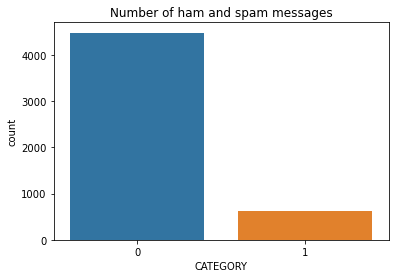

In [4]:

sns.countplot(df.label)
plt.xlabel('CATEGORY')
plt.title('Number of ham and spam messages')

In [4]:
X = df['sms']
Y = df['label']

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

# Data processing 
* Tokenize the data
* Padding 

In [6]:
max_words = 1000
from keras.utils import pad_sequences

max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

# RNN (Since LSTM is a type of LSTM)

In [7]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

**Model Compiling**

In [8]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
         

**Data Fitting**

In [9]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3476 samples, validate on 870 samples
Epoch 1/10
3476/3476 [==============================] - ETA: 0s - loss: 0.3881 - acc: 0.8567

F:\Conda\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3476/3476 [==============================] - 19s 5ms/sample - loss: 0.3881 - acc: 0.8567 - val_loss: 0.3052 - val_acc: 0.8448
Epoch 2/10
3476/3476 [==============================] - 5s 2ms/sample - loss: 0.2046 - acc: 0.9258 - val_loss: 0.1686 - val_acc: 0.9529


**Test data processing**

In [10]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

**Test data evaluation**

In [11]:
accr = model.evaluate(test_sequences_matrix,Y_test)

# **Print the fianl result**

In [12]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.165
  Accuracy: 0.952
